In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
episodes = pd.read_csv("episodes.csv")
podcasts = pd.read_csv("podcasts.csv")

## cleaning
____________________


In [3]:
episodes.drop(episodes[episodes["audio_length"] < 1].index, inplace = True)
episodes.drop(episodes[episodes["audio_length"] > 10_800].index, inplace = True)

In [4]:
episodes.shape, podcasts.shape

((855696, 7), (121175, 9))

In [5]:
podcasts.head(3)

,uuid,title,image,description,language,categories,website,author,itunes_id
0,8d62d3880db2425b890b986e58aca393,"Ecommerce Conversations, by Practical Ecommerce",http://is4.mzstatic.com/image/thumb/Music6/v4/...,Listen in as the Practical Ecommerce editorial...,English,Technology,http://www.practicalecommerce.com,Practical Ecommerce,874457373
1,cbbefd691915468c90f87ab2f00473f9,Eat Sleep Code Podcast,http://is4.mzstatic.com/image/thumb/Music71/v4...,On the show we’ll be talking to passionate peo...,English,Tech News | Technology,http://developer.telerik.com/,Telerik,1015556393
2,73626ad1edb74dbb8112cd159bda86cf,SoundtrackAlley,http://is5.mzstatic.com/image/thumb/Music71/v4...,A podcast about soundtracks and movies from my...,English,Podcasting | Technology,https://soundtrackalley.podbean.com,Randy Andrews,1158188937


In [6]:
episodes.head(3)

,title,audio,audio_length,description,pub_date,uuid,podcast_uuid
0,Piątek - 01 grudnia,https://cdneu.modlitwawdrodze.pl/prayers/MWD_2...,490,"święci męczennicy jezuiccy Edmund Campion SJ, ...",2017-12-01 00:00:00+00,fd5d891411174c7ca953c1f54657c3eb,811c18cf575841b3bef4601978f17ca9
1,Sobota - 02 grudnia,https://cdneu.modlitwawdrodze.pl/prayers/MWD_2...,481,"bł. Rafał Chyliński, prezbiter, Łk 21, 34-36",2017-12-02 00:00:00+00,5c28fa0a27b342cd92ff03c16a8019c2,811c18cf575841b3bef4601978f17ca9
2,Niedziela - 03 grudnia,https://cdneu.modlitwawdrodze.pl/prayers/MWD_2...,667,"Pierwsza Niedziela Adwentu, Mk 13, 33-37",2017-12-03 00:00:00+00,efdc9f4f07fa4c4883f8848256066cec,811c18cf575841b3bef4601978f17ca9


In [7]:
# genre_counts = pd.DataFrame(podcasts["categories"].value_counts().sort_index())

# genre_counts.columns = ["cat_count"]
# top_15_genres = genre_counts.sort_values("cat_count", ascending=False).head(15)
# plt.barh(top_15_genres.index, 
#          top_15_genres['cat_count'])

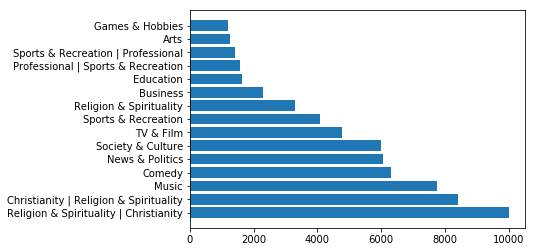

In [8]:
(episodes.shape[0] - len(set(episodes.title))), ( len(set(episodes.uuid)) - len(set(episodes.title)))

(198838, 198838)

In [9]:
(len(set(podcasts.uuid)) - len(set(podcasts.title))), ( len(set(podcasts.uuid)) - len(set(podcasts.title)))

(2863, 2863)

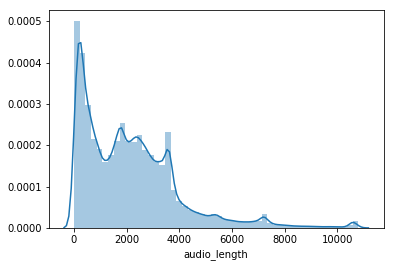

In [10]:
sns.distplot(episodes["audio_length"])

In [11]:
episodes[episodes["audio_length"]== 300]["audio"]

689       https://play.podtrac.com/npr-500005/npr.mc.tri...
735       http://arkiv.radio24syv.dk/19476792/20163851/f...
736       http://arkiv.radio24syv.dk/19476789/20163479/f...
1142      https://play.podtrac.com/npr-500005/npr.mc.tri...
1263      http://arkiv.radio24syv.dk/19476789/20164154/b...
                                ...                        
876853    https://grani-vremeni.podster.fm/3804/download...
876854    https://grani-vremeni.podster.fm/3803/download...
876855    https://grani-vremeni.podster.fm/3802/download...
877079    http://sverigesradio.se/topsy/ljudfil/itunes/6...
879801    http://rf.proxycast.org/1380821118264287232/18...
Name: audio, Length: 3304, dtype: object

In [12]:
episodes["length_first_dig"] = episodes["audio_length"].map(lambda x: int(str(x)[0]))

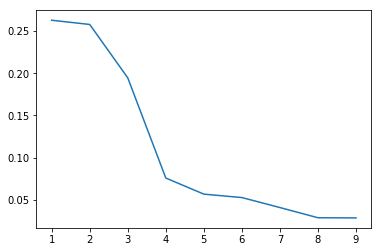

In [13]:
plt.plot(episodes["length_first_dig"].value_counts(normalize=True))

In [42]:
podcasts["multi_categories"] = podcasts["categories"].str.contains("|", regex=False).astype("int64")

In [43]:
genres = list(set(podcasts[podcasts["multi_categories"] == 0]["categories"]))
genres

['Kids & Family',
 'Health',
 'Society & Culture',
 'Technology',
 'Science & Medicine',
 'Government & Organizations',
 'Religion & Spirituality',
 'Business',
 'Arts',
 'Games & Hobbies',
 'Sports & Recreation',
 'Music',
 'Education',
 'Comedy',
 'TV & Film',
 'News & Politics']

In [45]:
left_out_genre = []
for pod in podcasts["categories"]:
    count = 0
    for genre in genres:
        if not genre in pod:
            count += 1
    if count == len(genres):
        left_out_genre.append(pod)

In [46]:
left_out_genre

[]

## EDA (11/30)
________________

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
podcasts = pd.read_csv("Cleaned data/clean_podcasts.csv")

In [169]:
podcasts.head(1)

,episode_title,audio,text,audio_length,podcast_title,News & Politics_genre,Sports & Recreation_genre,Government & Organizations_genre,Comedy_genre,Arts_genre,...,Games & Hobbies_genre,TV & Film_genre,Society & Culture_genre,Technology_genre,Health_genre,Science & Medicine_genre,Kids & Family_genre,Business_genre,Religion & Spirituality_genre,Education_genre
0,Introduction to Luke,http://www.wgcr.net/images/TimelessTruths/TTT-...,luke 1:1 4,1691,Teaching Timeless Truths,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### How many podcasts have more than three genres?

In [170]:
genres = [genre for genre in podcasts.columns if "_genre" in genre]

In [171]:
len(genres)

16

In [172]:
podcasts["total_genres"] = 0

In [173]:
for genre in genres:
    podcasts["total_genres"] += podcasts[genre]

In [174]:
# number of episodes that have more than 5 genres
print(len(podcasts[podcasts["total_genres"] > 5]['podcast_title']))

247


In [175]:
# the number of podcasts that have more than 5 genres
print(len(set(podcasts[podcasts["total_genres"] > 5]['podcast_title'])))

41


In [176]:
# this is less than half a percent of the data. I think that it is justifiably dropped

drop = len(podcasts[podcasts["total_genres"] > 5]['podcast_title'])

drop/ len(podcasts)

0.0004170381176216333

In [177]:
podcasts.drop(podcasts[podcasts["total_genres"] > 5].index, inplace=True)
podcasts.reset_index(drop=True, inplace=True)

In [178]:
podcasts["text_lengths"] = [len(s) for s in podcasts["text"]]

### How many podcasts have lengthy enough descriptions?

In [179]:
long_pods = podcasts["text_lengths"] > 100000

podcasts.drop(podcasts[long_pods].index, inplace = True)
podcasts.reset_index(drop=True, inplace=True)

In [187]:
podcasts[(podcasts["text_lengths"] < 15) & (podcasts["Religion & Spirituality_genre"] ==0)]

,episode_title,audio,text,audio_length,podcast_title,News & Politics_genre,Sports & Recreation_genre,Government & Organizations_genre,Comedy_genre,Arts_genre,...,Society & Culture_genre,Technology_genre,Health_genre,Science & Medicine_genre,Kids & Family_genre,Business_genre,Religion & Spirituality_genre,Education_genre,total_genres,text_lengths
5866,Sugar Industry False PR and Facts,http://www.ddsradio.com/wp-content/uploads/201...,dr shoup,2706,Dr. Shoup Radio,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8
5867,Sex Trafficking Across America,http://www.ddsradio.com/wp-content/uploads/201...,dr shoup,2702,Dr. Shoup Radio,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8
5868,Beware of Improper Dental Implants,http://www.ddsradio.com/wp-content/uploads/201...,dr shoup,2708,Dr. Shoup Radio,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8
5869,Bad Snoring and Apnea Leads to Heart Failure,http://www.ddsradio.com/wp-content/uploads/201...,dr shoup,2646,Dr. Shoup Radio,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8
20983,Hoch Hurricane Pump Up,http://www.podtrac.com/pts/redirect.mp3/omnyst...,<p>enjoy< p>,734,560 WQAM,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591593,Rockhouse - Show #169,http://www.oldies104.net/podcast/media/rockhou...,12 21 2017,11261,Rockhouse on Oldies 104,0,0,0,0,1,...,1,0,0,0,0,0,0,0,3,10
591594,Rockhouse - Show #168,http://www.oldies104.net/podcast/media/rockhou...,12 14 2017,10655,Rockhouse on Oldies 104,0,0,0,0,1,...,1,0,0,0,0,0,0,0,3,10
591595,Rockhouse - Show #167,http://www.oldies104.net/podcast/media/rockhou...,12 7 2017,11132,Rockhouse on Oldies 104,0,0,0,0,1,...,1,0,0,0,0,0,0,0,3,9
591806,Braising,http://dts.podtrac.com/redirect.mp3/feed.audio...,braising,2911,Foreman and Wolf on Food and Wine on WYPR,0,0,0,0,1,...,1,0,0,0,0,0,0,0,2,8


In [203]:
cleaning_test = podcasts[(podcasts["text"].str.contains(">"))&(podcasts["text"].str.contains("<")) & (podcasts["text_lengths"] < 15)]
cleaning_test = cleaning_test[["episode_title", "text", "podcast_title" ]]

In [205]:
cleaning_test = cleaning_test[["episode_title", "text", "podcast_title" ]]

In [209]:
example = cleaning_test["text"][20983]

In [229]:
podcasts

,episode_title,audio,text,audio_length,podcast_title,News & Politics_genre,Sports & Recreation_genre,Government & Organizations_genre,Comedy_genre,Arts_genre,...,Society & Culture_genre,Technology_genre,Health_genre,Science & Medicine_genre,Kids & Family_genre,Business_genre,Religion & Spirituality_genre,Education_genre,total_genres,text_lengths
0,Introduction to Luke,http://www.wgcr.net/images/TimelessTruths/TTT-...,luke 1:1 4,1691,Teaching Timeless Truths,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,11
1,"Hear Ye, Hear Ye!",http://www.wgcr.net/images/TimelessTruths/TTT-...,luke 14:5 1:25,1689,Teaching Timeless Truths,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,15
2,How Should A King Come,http://www.wgcr.net/images/TimelessTruths/TTT-...,luke 1:26 80,1688,Teaching Timeless Truths,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,13
3,The Birthday of a King,http://www.wgcr.net/images/TimelessTruths/TTT-...,luke 2,1688,Teaching Timeless Truths,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,7
4,The Birthday of a King,http://www.wgcr.net/images/TimelessTruths/TTT-...,luke 2:1 24,1688,Teaching Timeless Truths,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592018,FR 17 - 51 - Report From Nigeria - Elijah Brow...,http://feeds.soundcloud.com/stream/359259245-f...,fr 17 51 report from nigeria elijah brown ...,872,Freedom's Ring Podcast,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,89
592019,FR 17 - 52 - Relitigate The Civil War - Greg H...,http://feeds.soundcloud.com/stream/359259239-f...,fr 17 52 relitigate the civil war greg hami...,872,Freedom's Ring Podcast,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,95
592020,FR 17 - 53 - Aid For Persecuted Religious Mino...,http://feeds.soundcloud.com/stream/359259236-f...,fr 17 53 aid for persecuted religious minori...,872,Freedom's Ring Podcast,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,106
592021,FR 18 - 01 - Update On Syria - Elijah Brown - ...,http://feeds.soundcloud.com/stream/359259233-f...,fr 18 01 update on syria elijah brown rel ...,872,Freedom's Ring Podcast,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,85


In [ ]:
import re
for i, text in zip(podcasts.index, podcasts["text"]):
    podcasts["text"][i] = re.sub("<[^>]*>", "", text)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [228]:
print(cleaning_test.shape[0])
cleaning_test[cleaning_test["text"] == ""]

603


,episode_title,text,podcast_title
56187,Cattle Current Podcast-December 01,,Cattle Current Market Update with Wes Ishmael
56188,Cattle Current Podcast-December 4,,Cattle Current Market Update with Wes Ishmael
56189,Cattle Current Podcast-December 5,,Cattle Current Market Update with Wes Ishmael
56190,Cattle Current Podcast-December 6,,Cattle Current Market Update with Wes Ishmael
56191,Cattle Current Podcast-December 7,,Cattle Current Market Update with Wes Ishmael
...,...,...,...
585408,The Joy of Christmas,,Bear Cove Baptist Sermons
586754,GPS Training Podcast – Episode 4 - GPS Trainin...,,GPS Training Podcast
586862,Ep. 7 - Christmas Time! with The Man Who Inven...,,Buddymeister Scores! - Your Podcast about the ...
590188,"Dec 24 - ""Jesus Messiah""",,KAC Baptist Church Podcast


In [ ]:
# pause and return to clean descriptions with HTML tags through regex
#  - What is the word count of the podcast description?

### How many of each type of genre do I have? normalized!

In [ ]:
genre_dist = {genre: np.mean(podcasts[genre]) for genre in genres}
genre_dist = pd.DataFrame(genre_dist.values(), index=genre_dist.keys(), columns=["genre_percentage"])
genre_dist.sort_values("genre_percentage", inplace=True)

In [ ]:
genre_dist.index = genre_dist.index.str.replace("_genre", "")

In [ ]:
colors = {'Kids & Family': "maroon", 
 'Science & Medicine': "maroon", 
 'Government & Organizations': "m",
 'Games & Hobbies': "navy", 
 'Technology': "navy", 
 'Health': "navy", 
 'Arts': "forestgreen", 
 'Education': "forestgreen", 
 'Music': "forestgreen",
 'TV & Film': "gold", 
 'Business': "gold", 
 'Comedy': "gold", 
 'Society & Culture': "darkorange",
 'Sports & Recreation': "darkorange", 
 'News & Politics': "darkorange", 
 'Religion & Spirituality': "firebrick"}
plt.figure(figsize=(5,8))
plt.title("Genre Distribution")
plt.barh(genre_dist.index, genre_dist["genre_percentage"], color=colors.values())

plt.show();